In [ ]:
!pip install roboflow
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key="jTsbvLGjdZ2wo8geJ5Y3")
project = rf.workspace("teste-ylhuh").project("teste-xa3x6")
version = project.version(1)
dataset = version.download("clip")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Teste-1 in clip:: 100%|██████████| 10124/10124 [00:08<00:00, 1160.28it/s]


In [ ]:
!rm -rf '/content/Teste-1/train/.ipynb_checkpoints'
!rm -rf '/content/Teste-1/test/.ipynb_checkpoints'
!rm -rf '/content/Teste-1/valid/.ipynb_checkpoints'
!rm '/content/Teste-1/test/_tokenization.txt'
!rm '/content/Teste-1/train/_tokenization.txt'
!rm '/content/Teste-1/valid/_tokenization.txt'

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Define paths to your train, validation, and test data
train_data_dir = '/content/Teste-1/train/'
valid_data_dir = '/content/Teste-1/valid/'
test_data_dir = '/content/Teste-1/test/'
# Parameters
img_height, img_width = 224, 224  # Input image dimensions for MobileNetV3
batch_size = 32
num_classes = len(os.listdir(train_data_dir))   # Number of classes in your dataset

# Data generators with augmentation for train data
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 6564 images belonging to 6 classes.
Found 2525 images belonging to 6 classes.


In [ ]:
print("Classes in training data:")
for class_name, class_index in train_generator.class_indices.items():
    print(f"Class name: {class_name}, Class index: {class_index}")

print("\nClasses in validation data:")
for class_name, class_index in validation_generator.class_indices.items():
    print(f"Class name: {class_name}, Class index: {class_index}")


Classes in training data:
Class name: freshapples, Class index: 0
Class name: freshbanana, Class index: 1
Class name: freshoranges, Class index: 2
Class name: rottenapples, Class index: 3
Class name: rottenbanana, Class index: 4
Class name: rottenoranges, Class index: 5

Classes in validation data:
Class name: freshapples, Class index: 0
Class name: freshbanana, Class index: 1
Class name: freshoranges, Class index: 2
Class name: rottenapples, Class index: 3
Class name: rottenbanana, Class index: 4
Class name: rottenoranges, Class index: 5


In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Load MobileNetV2 as base model (pre-trained on ImageNet)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Create a new model
model = Sequential()

# Add the MobileNetV2 base model
model.add(base_model)

# Add layers on top of MobileNetV2
model.add(Flatten())
model.add(Dense(64, activation='relu'))  # Adjust units as needed
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# Freeze MobileNetV2 layers (optional)
base_model.trainable = False

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 64)                4014144   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 6272518 (23.93 MB)
Trainable params: 4014534 

In [ ]:
# Train the model
epochs = 5  # Adjust the number of epochs as needed
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Evaluate on test data
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
205/205 [==============================] - 554s 3s/step - loss: 0.9147 - accuracy: 0.7843 - val_loss: 0.1692 - val_accuracy: 0.9515
Epoch 2/5
205/205 [==============================] - 526s 3s/step - loss: 0.3799 - accuracy: 0.8657 - val_loss: 0.2233 - val_accuracy: 0.9391
Epoch 3/5
205/205 [==============================] - 522s 3s/step - loss: 0.3273 - accuracy: 0.8928 - val_loss: 0.2306 - val_accuracy: 0.9415
Epoch 4/5
205/205 [==============================] - 497s 2s/step - loss: 0.2956 - accuracy: 0.8941 - val_loss: 0.1440 - val_accuracy: 0.9407
Epoch 5/5
205/205 [==============================] - 527s 3s/step - loss: 0.3162 - accuracy: 0.8887 - val_loss: 0.1266 - val_accuracy: 0.9531
Found 1009 images belonging to 6 classes.
31/31 [==============================] - 45s 1s/step - loss: 0.0877 - accuracy: 0.9637
Test accuracy: 0.9637096524238586


Found 1009 images belonging to 6 classes.
32/32 [==============================] - 50s 1s/step


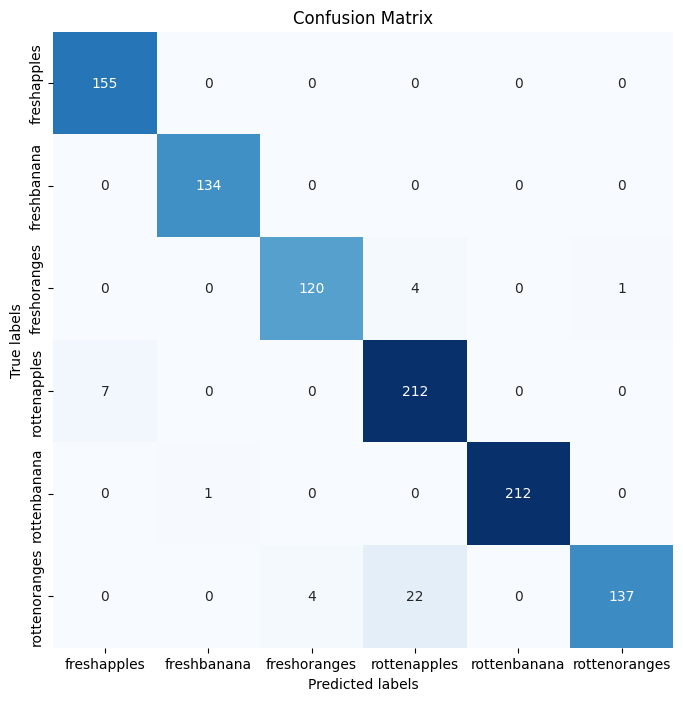

               precision    recall  f1-score   support

  freshapples       0.96      1.00      0.98       155
  freshbanana       0.99      1.00      1.00       134
 freshoranges       0.97      0.96      0.96       125
 rottenapples       0.89      0.97      0.93       219
 rottenbanana       1.00      1.00      1.00       213
rottenoranges       0.99      0.84      0.91       163

     accuracy                           0.96      1009
    macro avg       0.97      0.96      0.96      1009
 weighted avg       0.96      0.96      0.96      1009



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the saved model (if not already loaded)
# model = tf.keras.models.load_model('mobilenetv3_small_model.h5')

# Evaluate on test data
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Predict probabilities for the test set
predictions = model.predict(test_generator, steps=test_generator.samples // batch_size + 1)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_generator.classes

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys()))

In [ ]:

# Save the model
model.save('model.h5')

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [ ]:
import tensorflow as tf

# Assuming `model` is your trained TensorFlow model

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TensorFlow Lite model to a file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print('TensorFlow Lite model saved successfully.')

TensorFlow Lite model saved successfully.


In [ ]:
# Save model architecture as JSON (no weights)
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save model weights in binary format
model.save_weights("model_weights.bin")